In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import sparsity_utils
import simulation_utils

plt.rcParams['figure.dpi']=300
plt.style.use('seaborn-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

/var/tmp/ipykernel_10064/1291020484.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


# Complete Recovery (Fig 1)

In [2]:
VERSION = 'SUBMIT'

L = 8
q = 2
K = 2
V = 'random'
N = q**L

_, _, phi, _ = sparsity_utils.sample_gnk_fitness_function(L, q, K=K, V=V)
f = np.load(f"results/complete_recovery_results/main_text/f_{VERSION}.npy")
f_ = np.load(f"results/complete_recovery_results/main_text/fprime_{VERSION}.npy")
fhat = np.load(f"results/complete_recovery_results/main_text/fhat_{VERSION}.npy")
beta = phi.T@f

fnorm_ = (f_ - np.mean(f_)) / np.std(f_)
betanorm_ = phi.T@fnorm_
betahat = phi.T@fhat

/var/tmp/ipykernel_10064/3795229469.py:124: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=1.25, hspace=0.15)
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because no

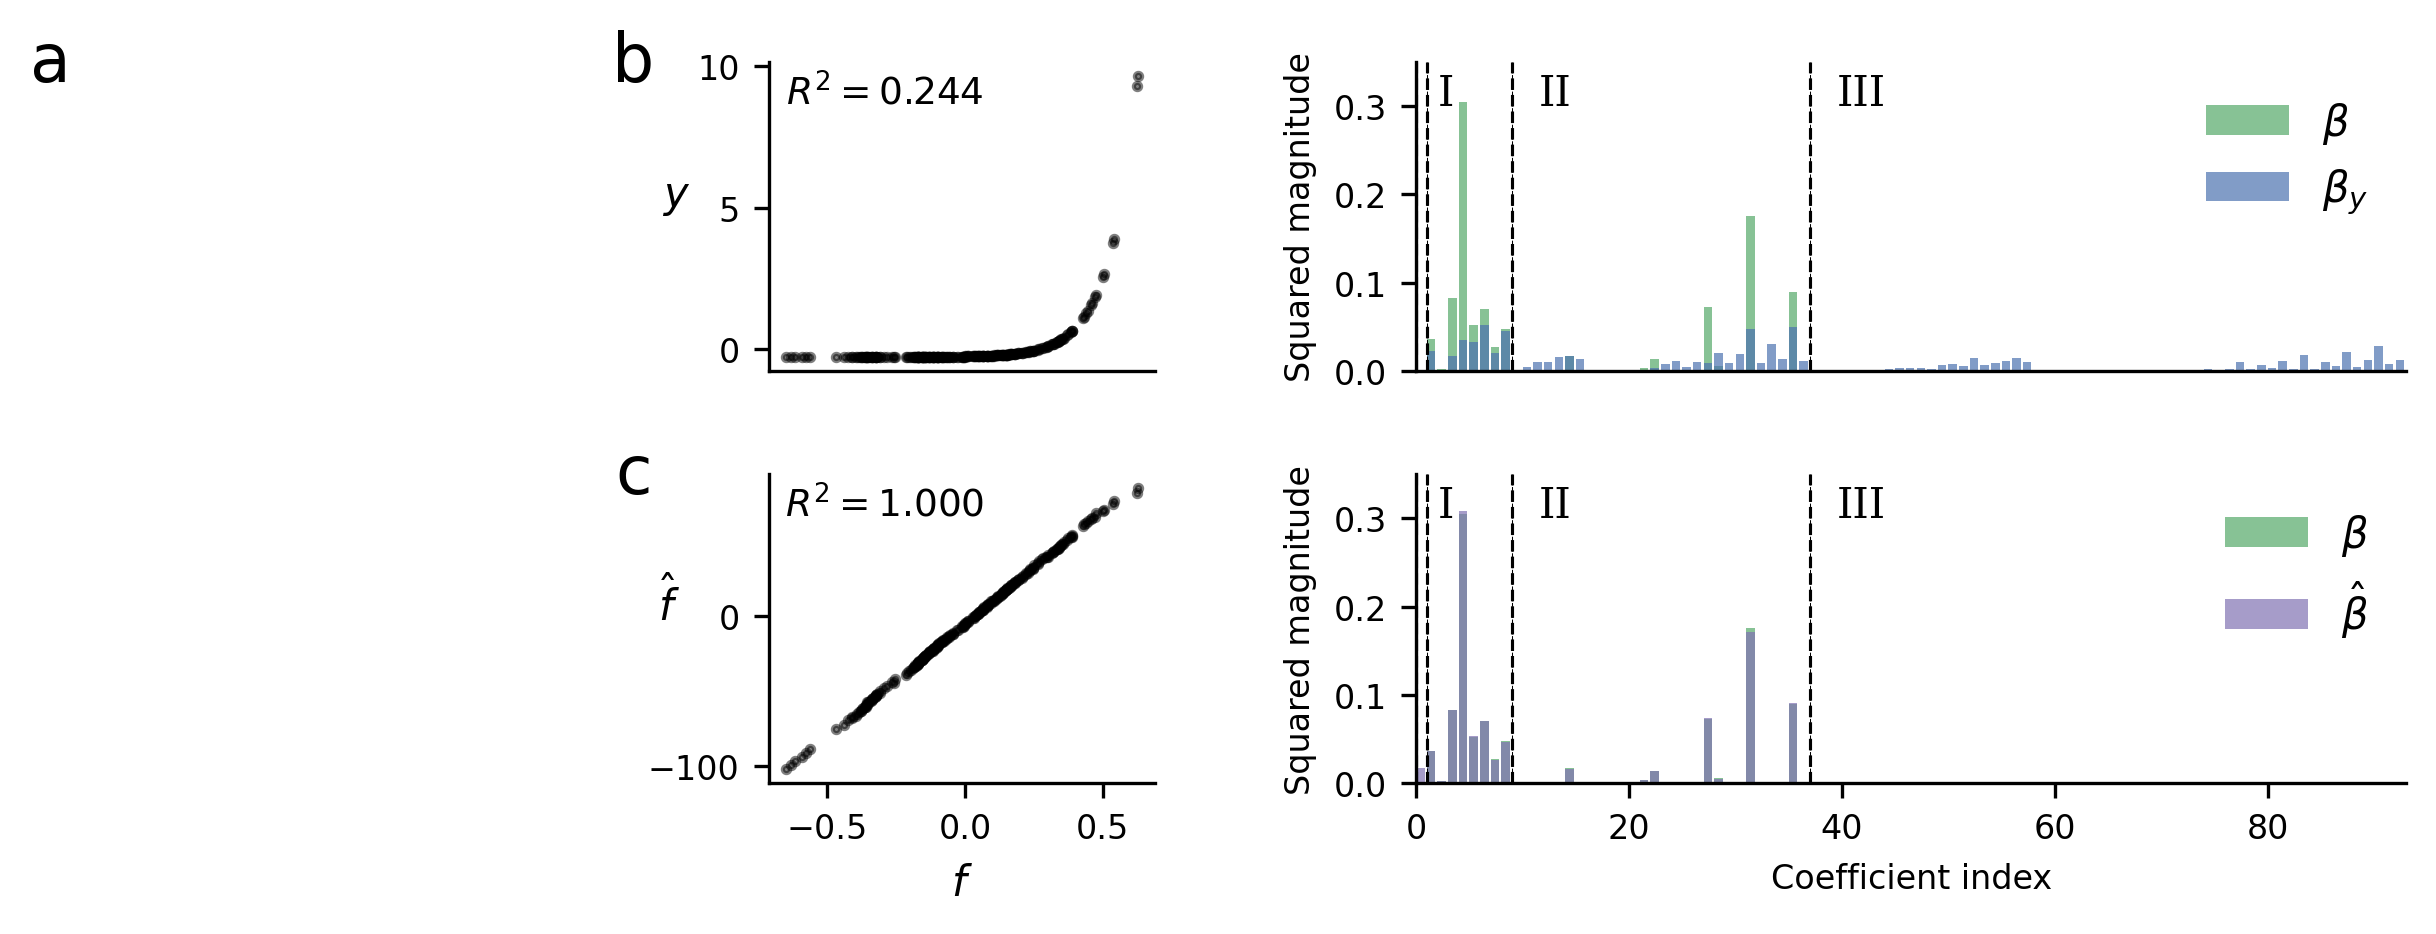

In [3]:
fig = plt.figure(constrained_layout=True, figsize=(8, 3))
gs = fig.add_gridspec(2, 10)

ax1 = fig.add_subplot(gs[0, 2:5])
ax2 = fig.add_subplot(gs[0, 5:])
ax3 = fig.add_subplot(gs[1, 2:5])
ax4 = fig.add_subplot(gs[1, 5:])
ax5 = fig.add_subplot(gs[:, :2])

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax1.scatter(f, fnorm_, s=3,  c='k', alpha=0.5)
r2 = pearsonr(f, fnorm_)[0]**2
ax1.text(0.3, 0.9, f'$R^2={r2:0.3f}$',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax1.transAxes,
        fontsize=9)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# ax1.set_xlabel("$f$")
ax1.set_ylabel("$y$", labelpad=5, rotation=0)
ax1.set_box_aspect(4/5)
ax1.set_xticks([])

sparsity_utils.make_barplot(L, [beta, betanorm_], labels=["$\\beta$", "$\\beta_y$"], up_to=3, ax=ax2, 
             colors=[colors[1], colors[0]])
ax2.set_ylabel("Squared magnitude",fontsize=8)
# ax2.set_xlabel("Coefficient index")
ax2.set_xlabel(None)
ax2.set_ylim([0, 0.35])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.text(0.03, 0.9, 'I',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax2.transAxes,
     fontname='Helvetica',
     family='serif'
     )
ax2.text(0.14, 0.9, 'II',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax2.transAxes,
     fontname='Helvetica',
     family='serif'
     )
ax2.text(0.45, 0.9, 'III',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax2.transAxes,
     fontname='Helvetica',
     family='serif'
     )

ax2.set_xticks([])

#########

ax3.scatter(f, fhat, s=3, c='k', alpha=0.5)
r2 = pearsonr(f, fhat)[0]**2
ax3.text(0.3, 0.9, f'$R^2={r2:0.3f}$',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax3.transAxes,
        fontsize=9)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_ylabel("$\hat{f}$", labelpad=-5, rotation=0)
ax3.set_xlabel("$f$")
ax3.set_box_aspect(4/5)

sparsity_utils.make_barplot(L, [beta, betahat], labels=["$\\beta$", "$\\hat{\\beta}$"], up_to=3, ax=ax4, 
             colors=[colors[1], colors[3]])
ax4.set_ylim([0, 0.35])
ax4.set_ylabel("Squared magnitude",fontsize=8)
ax4.set_xlabel("Coefficient index", fontsize=8)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

ax4.text(0.03, 0.9, 'I',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax4.transAxes,
     fontname='Helvetica',
     family='serif'
     )
ax4.text(0.14, 0.9, 'II',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax4.transAxes,
     fontname='Helvetica',
     family='serif'
     )
ax4.text(0.45, 0.9, 'III',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax4.transAxes,
     fontname='Helvetica',
     family='serif'
     )

ax1.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='major', labelsize=8)
ax3.tick_params(axis='both', which='major', labelsize=8)
ax4.tick_params(axis='both', which='major', labelsize=8)
ax5.axis('off')
ax5.text(-0.35, 1, 'a',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax5.transAxes,
     fontsize=16)
ax1.text(-0.35, 1, 'b',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax1.transAxes,
     fontsize=16)
ax3.text(-0.35, 1, 'c',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax3.transAxes,
     fontsize=16)

plt.subplots_adjust(wspace=1.25, hspace=0.15)
# plt.tight_layout()
plt.show()

# Figure 2

## Load train size results

In [22]:
K = 2
alpha=10

VERSION = 'SUBMIT'
df = pd.read_csv("results/train_size_results/train_size_results_%s.csv" % VERSION, index_col=0)

bt_results = df.query("loss=='bradley_terry'").groupby("train_size").agg({"test_pearson":['mean', 'std'],
                                                                 "test_spearman": ['mean', 'std']})
mse_results = df.query("loss=='mse'").groupby("train_size").agg({"test_pearson":['mean', 'std'],
                                                                 "test_spearman": ['mean', 'std']})

mse_pearsons = mse_results['test_pearson']
mse_spearmans = mse_results['test_spearman']
bt_pearsons = bt_results['test_pearson']
bt_spearmans = bt_results['test_spearman']

## Load entropy results

In [23]:
VERSION = f'SUBMIT'

df = pd.read_csv("results/entropy_results/entropy_results_%s.csv" % VERSION, index_col=0)

## Calculate Uncertainty principle results

In [24]:
L = 10
q = 2
K = 3
V = 'random'
N = q**L
f, beta, phi, seqs = sparsity_utils.sample_gnk_fitness_function(L, q, K=K, V=V) 

alphas = np.logspace(-1, 2.5, 100)
H_beta = np.zeros(len(alphas))
H_f = np.zeros(len(alphas))
for i, alpha in enumerate(alphas):
    f_ = simulation_utils.exponential(f, alpha=alpha)
    beta_ = phi.T@f_
    H_beta[i] = simulation_utils.calc_entropy(beta_)
    H_f[i] = simulation_utils.calc_entropy(f_)

/home/jupyter/contrastive_loss_paper/simulation_utils.py:172: RuntimeWarning: divide by zero encountered in log
  H = -np.nansum(p*np.log(p))
/home/jupyter/contrastive_loss_paper/simulation_utils.py:172: RuntimeWarning: invalid value encountered in multiply
  H = -np.nansum(p*np.log(p))


## Make plot

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

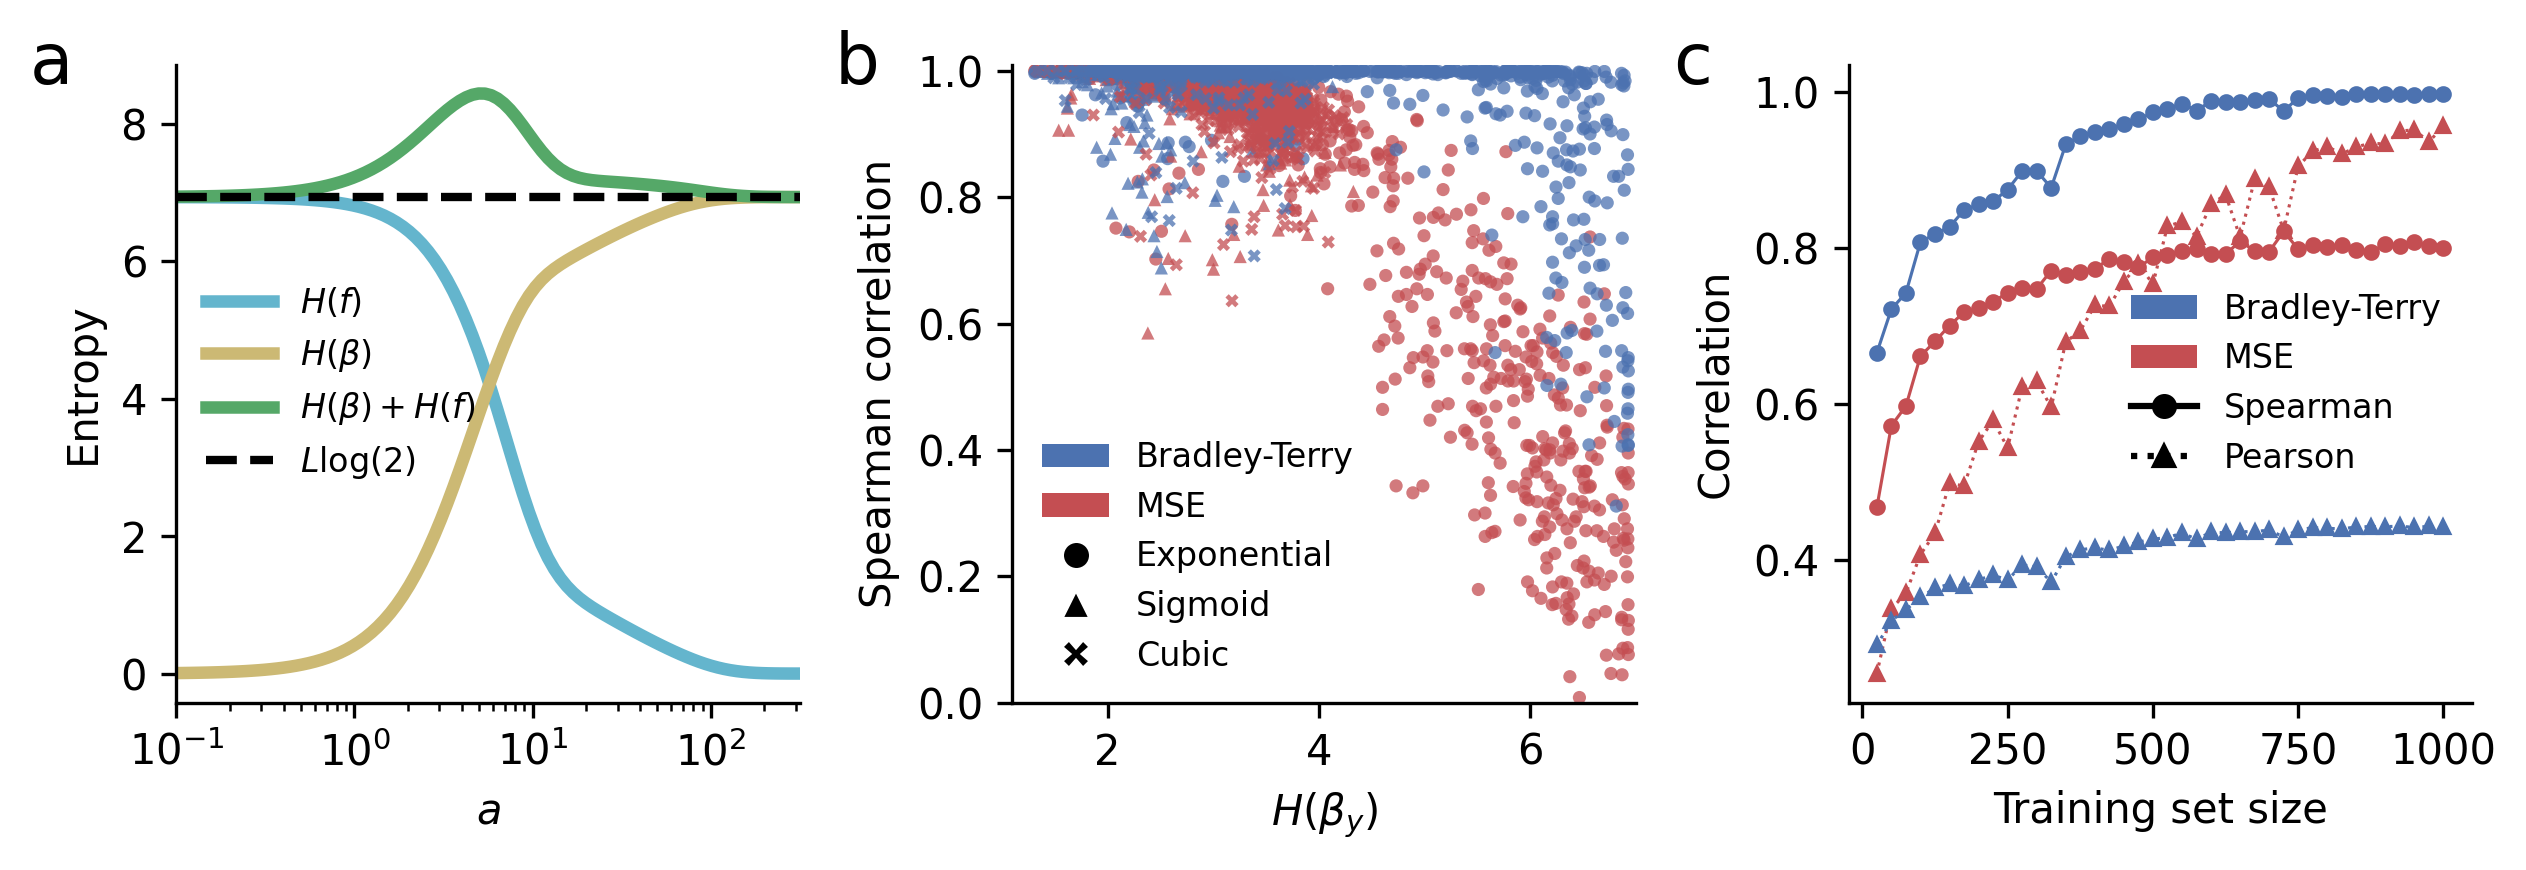

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(8.5, 3))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


# Uncertainty principle
ax = axes[0]
lw = 3
ax.plot(alphas, H_f, label="$H(f)$", c=colors[5], lw=lw)
ax.plot(alphas, H_beta, label="$H(\\beta)$", c=colors[4], lw=lw)
ax.plot(alphas, H_f + H_beta,  label="$H(\\beta) + H(f)$", c=colors[1], lw=lw)
ax.axhline(L*np.log(2), c='k', ls='--', label="$L \log(2)$", lw=2)
ax.set_xlabel("$a$")
ax.set_ylabel("Entropy")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False, fontsize=8)
ax.set_xscale('log')
ax.set_xlim([alphas[0], alphas[-1]])


# Entropy results
ax = axes[1]
bt_color = colors[0]
mse_color = colors[2]
s = 10
alpha=0.75
markers = ['o', '^', 'X']
for i, g in enumerate(df['nonlinearity'].unique()):
    lbl1=None
    lbl2 = None
    bt_data = df.query(f"nonlinearity=='{g}' and loss=='bradley_terry'")
    mse_data = df.query(f"nonlinearity=='{g}' and loss=='mse'")
    
    ax.scatter(mse_data['entropy'], mse_data['test_spearman'], 
               c=mse_color, s=s, alpha=alpha, marker=markers[i],
              edgecolor='none', label=lbl1)
    ax.scatter(bt_data['entropy'], bt_data['test_spearman'], 
               c=bt_color, s=s, alpha=alpha, marker=markers[i],
              edgecolor='none', label=lbl2)

    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Spearman correlation")
ax.set_xlabel("$H(\\beta_y)$")
ax.set_xlim([1.1, L*np.log(2)*1.01])
ax.set_ylim([0, 1.01])
# ax.legend(frameon=False)

legend_elements = [Patch(facecolor=bt_color, label='Bradley-Terry'),
                   Patch(facecolor=mse_color, label='MSE'),
                   Line2D([0], [0], marker=markers[0], color='w', label='Exponential',
                          markerfacecolor='k', markersize=7),
                   Line2D([0], [0], marker=markers[1], color='w', label='Sigmoid',
                          markerfacecolor='k', markersize=7),
                   Line2D([0], [0], marker=markers[2], color='w', label='Cubic',
                          markerfacecolor='k', markersize=7),
                   
                  ]
ax.legend(handles=legend_elements, frameon=False, fontsize=8)


# train size
ax = axes[2]
bt_color = colors[0]
mse_color = colors[2]

pearson_marker = '^'
pearson_ls = ':'

spearman_marker = 'o'
spearman_ls = '-'
lw=0.75
ms = 3


# spearmans
ax.plot(mse_spearmans['mean'].index, 
                      mse_spearmans['mean'], 
                      marker=spearman_marker,
                      ls=spearman_ls,
                      linewidth=lw, 
                      c=mse_color, 
                      markersize=ms,
                      label='MSE')

ax.plot(bt_spearmans['mean'].index, 
                      bt_spearmans['mean'], 
                      marker=spearman_marker,
                      ls=spearman_ls,
                      linewidth=lw, 
                      c=bt_color, 
                      markersize=ms,
                      label='Bradley-Terry')

# pearsons
ax.plot(mse_pearsons['mean'].index, 
                      mse_pearsons['mean'], 
                      marker=pearson_marker,
                      ls=pearson_ls,
                      linewidth=lw, 
                      c=mse_color, 
                      markersize=ms,
                      label='MSE')

ax.plot(bt_pearsons['mean'].index, 
                      bt_pearsons['mean'], 
                      marker=pearson_marker,
                      ls=pearson_ls,
                      linewidth=lw, 
                      c=bt_color, 
                      markersize=ms,
                      label='Bradley-Terry')

ax.set_xlabel("Training set size")
ax.set_ylabel("Correlation")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


legend_elements = [Patch(facecolor=bt_color, label='Bradley-Terry'),
                   Patch(facecolor=mse_color, label='MSE'),
                   Line2D([0], [0], marker=spearman_marker, color='k', label='Spearman', ls=spearman_ls,
                          markerfacecolor='k', markersize=5),
                   Line2D([0], [0], marker=pearson_marker, color='k', label='Pearson', ls=pearson_ls,
                          markerfacecolor='k', markersize=5),
                   
                  ]
ax.legend(handles=legend_elements, frameon=False, fontsize=8)
# ax.set_ylim([0.6, 1.01])
# ax.set_xlim([0, 250])
ax.set_xticks([0, 250, 500, 750, 1000])


# Other stuff
axes[0].text(-0.2, 1, 'a',
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[0].transAxes,
     fontsize=17)
axes[1].text(-0.25, 1, 'b',
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[1].transAxes,
     fontsize=17)
axes[2].text(-0.25, 1, 'c',
     horizontalalignment='center',
     verticalalignment='center',
     transform = axes[2].transAxes,
     fontsize=17)


plt.tight_layout()
plt.show()

# Appendix: multiple exact recovery results

/var/tmp/ipykernel_10064/2026388817.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[0]._sizes = [10]
/var/tmp/ipykernel_10064/2026388817.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[1]._sizes = [10]
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families w

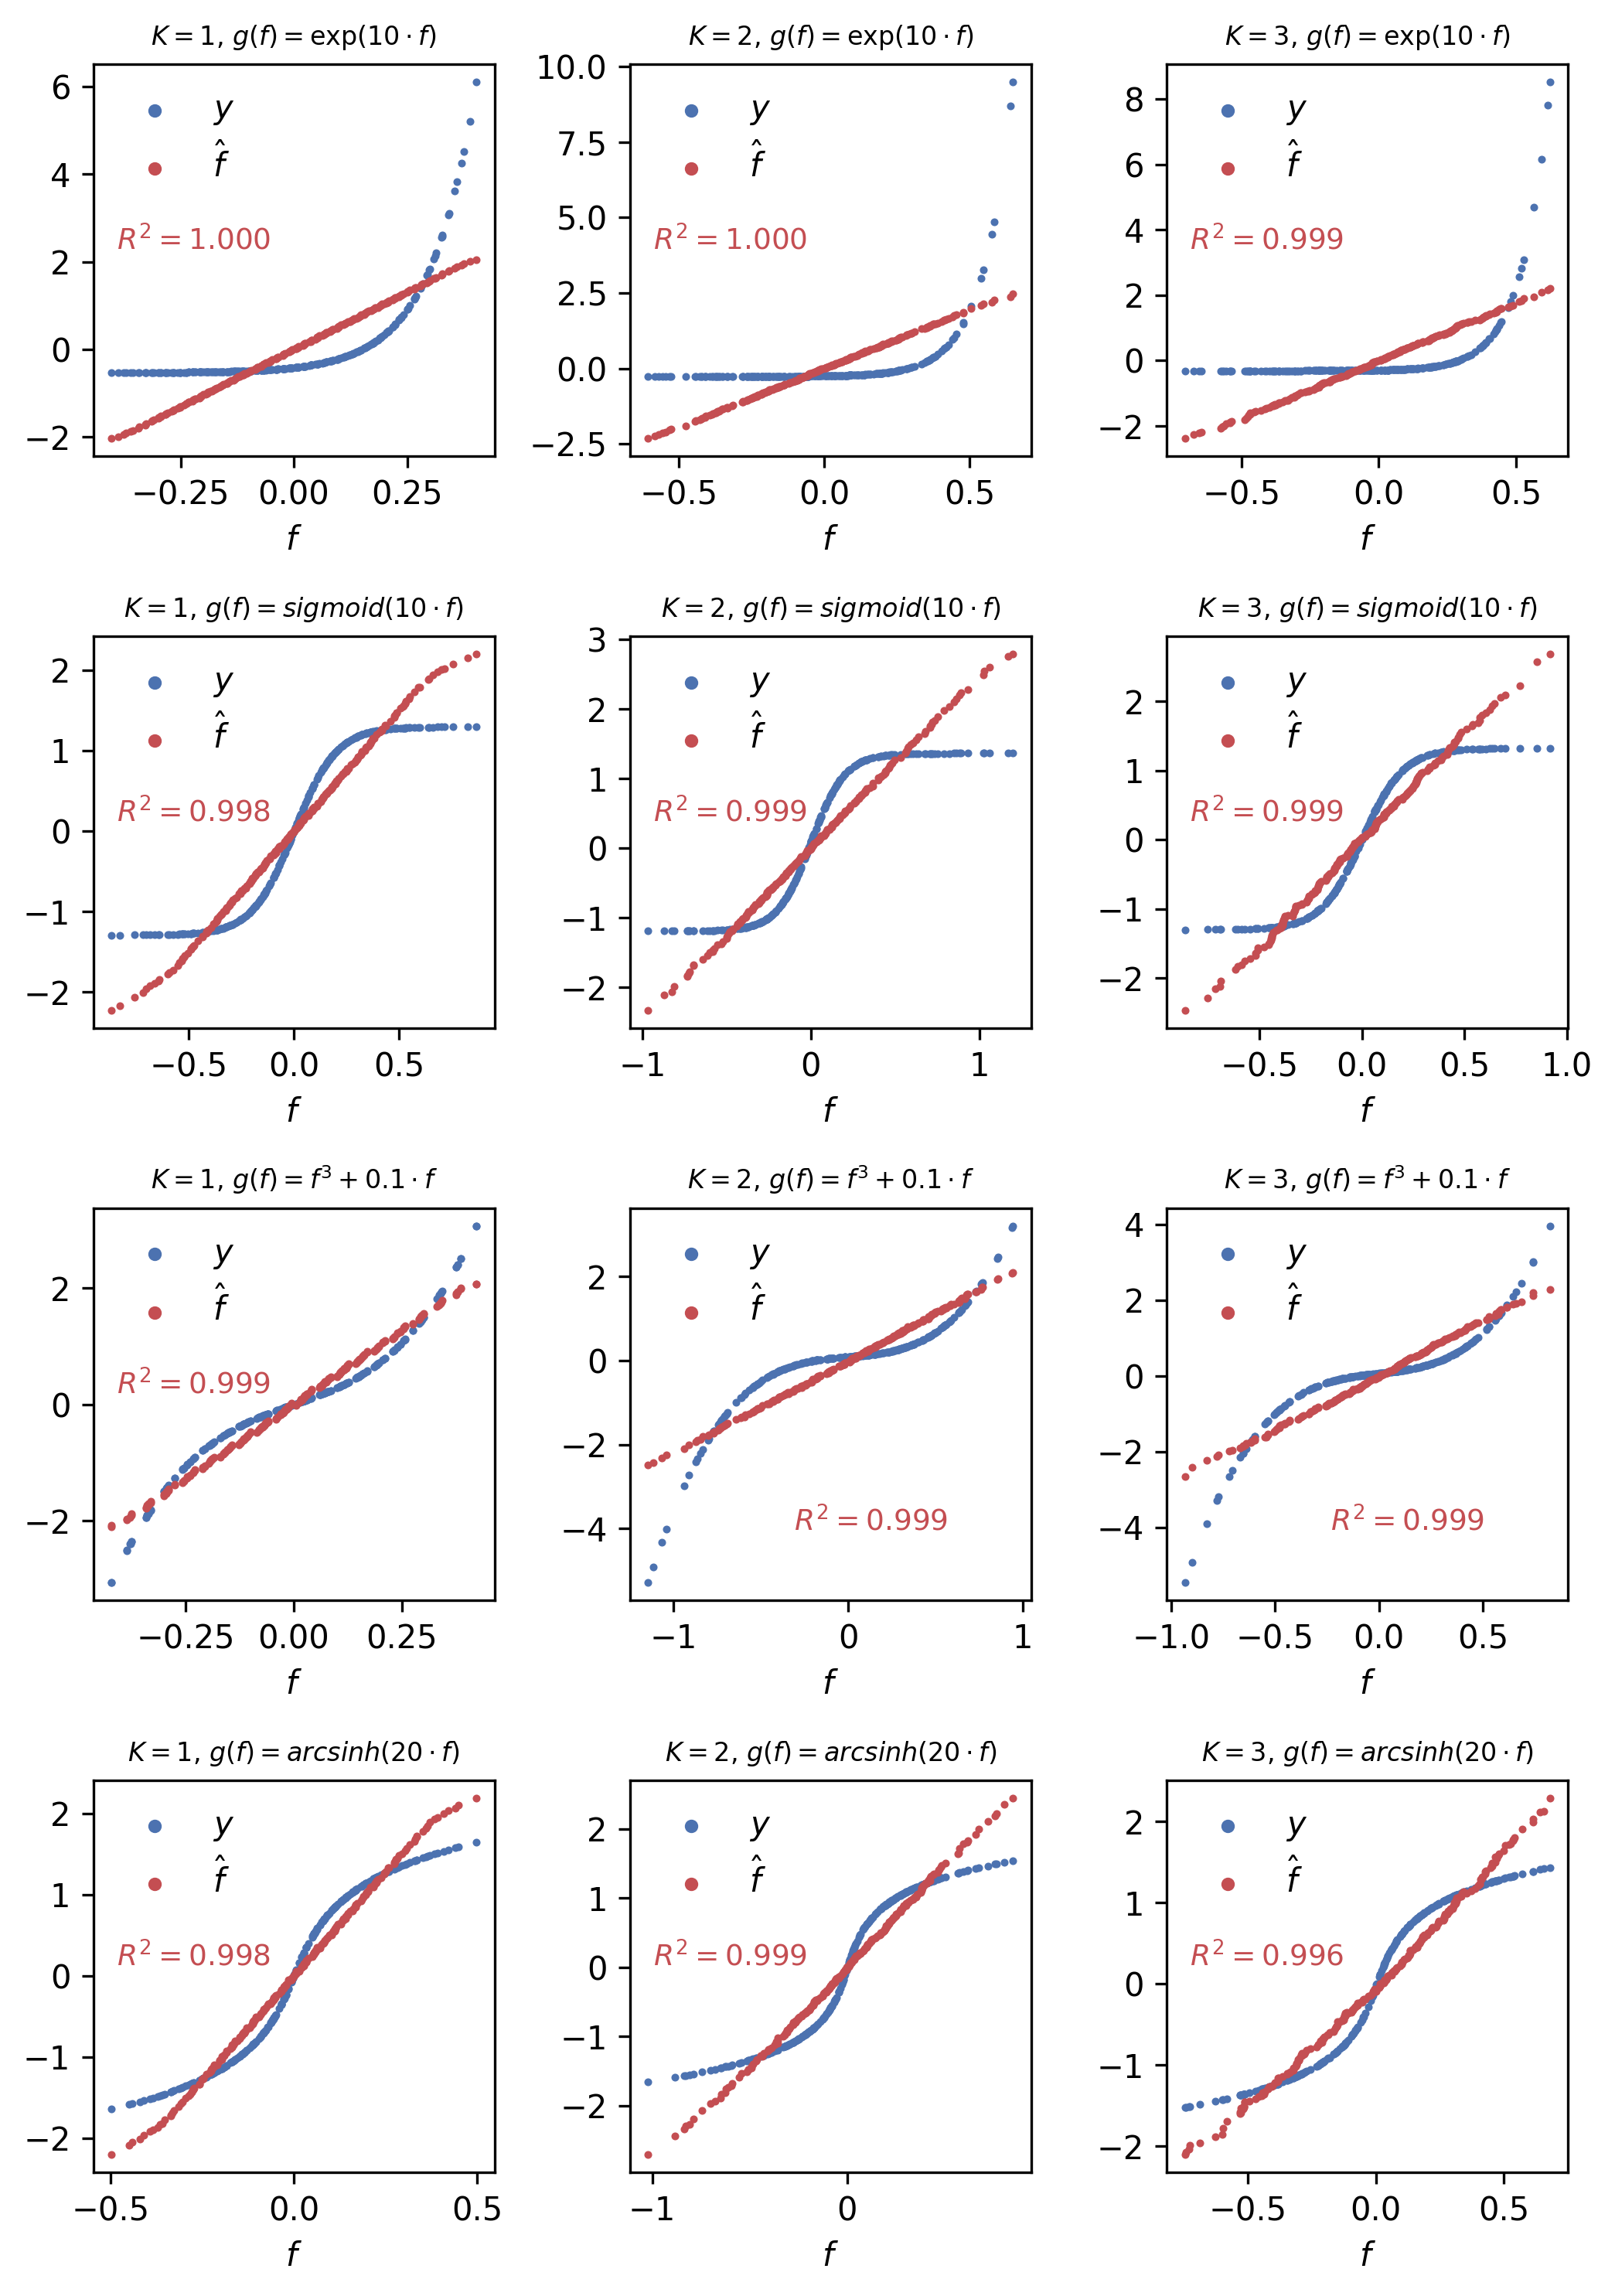

In [26]:

fig, axes = plt.subplots(4, 3, figsize=(7, 10))

labels = {
    'sigmoid' : '$g(f) = sigmoid(10\\cdot f)$',
    'exponential': '$g(f) = \\exp(10\\cdot f)$',
    'cubic': '$g(f) = f^3 + 0.1\cdot f$',
    'arcsinh': '$g(f) = arcsinh(20 \\cdot f)$',
}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, g in enumerate(["exponential", "sigmoid", "cubic", "arcsinh"]):
    for j, K in enumerate([1, 2, 3]):
        ax = axes[i, j]
        ax.set_title(f"$K={K}$, {labels[g]}", fontsize=8)
        
        results = np.load(f"results/complete_recovery_results/appendix/f_{K}_{g}_results.npy", allow_pickle=True)
        f = results.item()["f"]
        f_ = results.item()["fprime"]
        fhat = results.item()["fhat"]
        fhat = (fhat - np.mean(fhat)) / np.std(fhat)        
        ax.scatter(f, f_, c=colors[0], s=2, label="$y$")
        ax.scatter(f, fhat, c=colors[2], s=2, label="$\\hat{f}$")
        
        p1 = pearsonr(f, f_)[0]**2
        p2 = pearsonr(f, fhat)[0]**2
        
        lgnd = ax.legend(frameon=False)
        ax.set_xlabel("$f$")
        
        lgnd.legendHandles[0]._sizes = [10]
        lgnd.legendHandles[1]._sizes = [10]
        if i == 2 and j in [1, 2]:
            ax.text(0.6, 0.2, f'$R^2={p2:0.3f}$',
                 horizontalalignment='center',
                 verticalalignment='center',
                 transform = ax.transAxes,
                 fontsize=9, color=colors[2])
        else:
            ax.text(0.25, 0.55, f'$R^2={p2:0.3f}$',
                 horizontalalignment='center',
                 verticalalignment='center',
                 transform = ax.transAxes,
                 fontsize=9, color=colors[2])
            
plt.tight_layout()
    